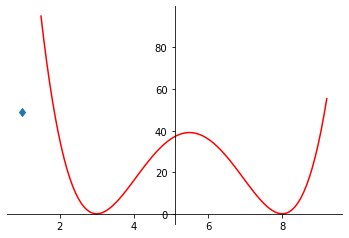

In [1]:
import matplotlib.pyplot as plt
import numpy as np


# 100 linearly spaced numbers
x = np.linspace(1.5,9.2,100)

# the function, which is y = x^2 here
y = ((x-3)**2)*((x-8)**2)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

x0=1
y0=((x0-3)**2-3)*(x0-8)**2

# plot the function
plt.plot(x,y, 'r')
plt.plot(x0,y0,'d')

# show the plot
plt.show()

In [2]:
pip install vector2d

Note: you may need to restart the kernel to use updated packages.


In [5]:
import math
import random
import matplotlib.pyplot as plt
import vector2d.Vector2D

class Particle:
    """A circular particle of unit mass with position and velocity."""

    def __init__(self, x, y, vx, vy, radius=0.01):
        self.pos = Vector2D(x, y)
        self.vel = Vector2D(vx, vy)
        self.radius = radius

    def advance(self, dt):
        """Advance the particle's position according to its velocity."""

        # Use periodic boundary conditions: a Particle that moves across an
        # edge of the domain 0<=x<1, 0<=y<1 magically reappears at the opposite
        # edge.
        self.pos = (self.pos + self.vel * dt) % 1

    def distance_to(self, other):
        """Return the distance from this Particle to other Particle."""
        return self.pos.distance_to(other.pos)

    def get_speed(self):
        """Return the speed of the Particle from its velocity."""
        return abs(self.vel)


class Simulation:
    """A simple simulation of circular particles in motion."""

    def __init__(self, nparticles=100, radius=0.01, v0=0.05):
        self.nparticles = nparticles
        self.radius = radius
        # Randomly initialize the particles' positions and velocity directions.
        self.particles = [self.init_particle(v0) for i in range(nparticles)]
        self.t = 0

    def init_particle(self, v0=0.05):
        """Return a new Particle object with random position and velocity.

        The position is chosen uniformly from 0 <= x < 1, 0 <= y < 1;
        The velocity has fixed magnitude, v0, but random direction.

        """

        x, y = random.random(), random.random()
        theta = 2*math.pi * random.random()
        self.v0 = v0
        vx, vy = self.v0 * math.cos(theta), self.v0 * math.sin(theta)
        return Particle(x, y, vx, vy, self.radius)

    def advance(self, dt):
        """Advance the Simulation by dt in time, handling collisions."""

        self.t += dt
        for particle in self.particles:
            particle.advance(dt)

        # Find all distinct pairs of Particles currently undergoing a collision.
        colliding_pair = []
        for i in range(self.nparticles):
            pi = self.particles[i]
            for j in range(i+1, self.nparticles):
                pj = self.particles[j]
                # pi collides with pj if their separation is less than twice
                # their radius.
                if pi.distance_to(pj) < 2 * self.radius:
                    colliding_pair.append((i, j))

        print('ncollisions =', len(colliding_pair))
        # For each pair, the velocities change according to the kinetics of
        # an elastic collision between circles.
        for i,j in colliding_pair:
            p1, p2 = self.particles[i], self.particles[j]
            r1, r2 = p1.pos, p2.pos
            v1, v2 = p1.vel, p2.vel
            dr, dv = r2 - r1, v2 - v1
            dv_dot_dr = dv.dot(dr)
            d = r1.distance_to(r2) ** 2
            p1.vel = v1 - dv_dot_dr / d * (r1 - r2)
            p2.vel = v2 - dv_dot_dr / d * (r2 - r1)

if __name__ == '__main__':
    import numpy as np

    sim = Simulation(nparticles=1000, radius=0.005, v0=0.05)
    dt = 0.02

    nit = 500
    dnit = nit // 10
    for i in range(nit):
        if not i % dnit:
            print(f'{i}/{nit}')
        sim.advance(dt)

    # Plot a histogram of the Particles' speeds.
    nbins = sim.nparticles // 50
    hist, bins, _ = plt.hist([p.get_speed() for p in sim.particles], nbins,
                          density=True)
    v = (bins[1:] + bins[:-1])/2

    # The mean kinetic energy per Particle.
    KE = sim.v0**2 / 2
    # The Maxwell-Boltzmann equilibrium distribution of speeds.
    a = 1 / 2 / KE
    f = 2*a * v * np.exp(-a*v**2)
    plt.plot(v, f)

    plt.show()

ModuleNotFoundError: No module named 'vector2d'